In [20]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Function to automatic merge and fill missing values



## Create the function
You have to create a function which take 2 arguments :
- argument 1 : DataFrame main
- argument 2 : DataFrame opinion

Your function will return a new DataFrame which is the left merge of both DataFrames, and which has no missing values (so your function has to fill them), add new columns (flag, MONTH and DAY), and OPINION should be translated. 

So you have to copy each useful code from the previous quests, and integrate it into a function. **This should achieve the same results as the previous quests.**

In [12]:
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


In [13]:
def merge_and_fill(DataFrameMain, DataFrameOpinion):
  #Merge
  NewDataFrame = pd.merge(DataFrameMain ,
                          DataFrameOpinion, 
                          how="left", 
                          left_on='DATE',
                          right_on='date')

  #New column flag
  NewDataFrame['flag'] = NewDataFrame['OPINION'].isna()
  
  #Fills
  NewDataFrame['WEATHER_CODE_EVENING'].fillna(NewDataFrame['WEATHER_CODE_EVENING'].mean(), inplace = True)
  NewDataFrame['TOTAL_SNOW_MM'].fillna(0,inplace = True)
  NewDataFrame['UV_INDEX'].fillna(1.0,inplace = True)
  NewDataFrame['SUNHOUR'].fillna(method = 'ffill',inplace = True)
  NewDataFrame['OPINION'].fillna('unknown',inplace = True)

  #New column MONTH and DAY
  NewDataFrame['DATE']=pd.to_datetime(NewDataFrame['DATE'])
  NewDataFrame['MONTH']=NewDataFrame['DATE'].apply(lambda date: date.month)
  NewDataFrame['DAY']=NewDataFrame['DATE'].apply(lambda date: date.day)

  #Translate
  def translate(word):
    dico = {'bad' : 'mauvais',
          'very bad' : 'très mauvais',
          'not good not bad' : 'ni bon ni mauvais',
          'good' : 'bon',
          'very good' : 'très bon'}
    return dico[word] if word in dico.keys() else word
  NewDataFrame['OPINION'] = NewDataFrame['OPINION'].apply(translate)

  return NewDataFrame

merge_and_fill(df_main, df_opinion)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,2018-01-01,113.0,0.0,3.0,5.1,mauvais,False,1,1
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,2018-01-02,122.0,0.0,3.0,3.3,mauvais,False,1,2
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,2018-01-03,122.0,0.0,3.0,3.3,mauvais,False,1,3
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,2018-01-04,116.0,0.0,3.0,3.3,mauvais,False,1,4
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,2018-01-05,116.0,0.0,3.0,6.9,mauvais,False,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,2018-12-27,119.0,0.0,1.0,8.7,très mauvais,False,12,27
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,2018-12-28,113.0,0.0,1.0,8.7,très mauvais,False,12,28
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,2018-12-29,116.0,0.0,1.0,8.7,très mauvais,False,12,29
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,2018-12-30,143.0,0.0,1.0,3.3,très mauvais,False,12,30


## Execution with a loop
You will execute your function in a 9 rounds loop, once per year, and agregate this in a new big DataFrame with 24 columns and lots of rows.

In [14]:
# Each year between 2010 and 2018 (included) has 2 sources : weather_main_YYYY.csv and weather_opinion_YYYY.csv
dftotal = pd.DataFrame()
for year in range(2010, 2019):
  year = str(year)
  link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_" + year + ".csv"
  link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_" + year + ".csv"
  df_main = pd.read_csv(link_main)
  df_opinion = pd.read_csv(link_opinion)

  df_year = merge_and_fill(df_main , df_opinion)

  dftotal = pd.concat([dftotal , df_year])

dftotal

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY
0,2010-01-01,5,2,19,2,5,3,0.0,86,10.000,1012,62.875,5,3,-1,2010-01-01,119.0,0.0,1.0,5.1,très mauvais,False,1,1
1,2010-01-02,5,-1,6,-1,4,1,0.0,78,10.000,1022,31.375,5,0,2,2010-01-02,116.0,0.0,1.0,8.7,très mauvais,False,1,2
2,2010-01-03,5,1,26,2,4,2,0.3,61,9.875,1021,65.500,5,0,-3,2010-01-03,119.0,0.0,1.0,6.9,très mauvais,False,1,3
3,2010-01-04,1,-4,25,-2,0,-3,0.0,75,10.000,1017,9.875,1,0,-9,2010-01-04,113.0,0.0,1.0,8.7,très mauvais,False,1,4
4,2010-01-05,2,-5,20,-5,1,-4,0.0,71,10.000,1012,8.000,3,0,-10,2010-01-05,113.0,0.0,1.0,8.7,très mauvais,False,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,2018-12-27,119.0,0.0,1.0,8.7,très mauvais,False,12,27
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,2018-12-28,113.0,0.0,1.0,8.7,très mauvais,False,12,28
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,2018-12-29,116.0,0.0,1.0,8.7,très mauvais,False,12,29
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,2018-12-30,143.0,0.0,1.0,3.3,très mauvais,False,12,30


## Add 2019 & 2020

In [17]:
link2019 = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
link2020 = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv"

df2019 = pd.read_csv(link2019)
df2020 = pd.read_csv(link2020)

dftotal = pd.concat([dftotal , df2019, df2020])

# Draw a scatterplot
With Date on X-Axis and Max Temperature on Y-axis

The result must have 11 seasonality for the 11 summers/winters alternance.




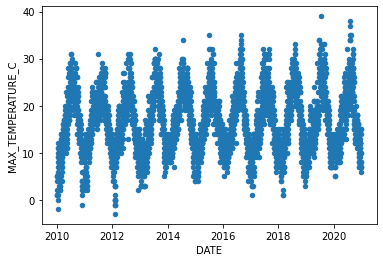

In [19]:
dftotal.plot.scatter(x = 'DATE',
                     y='MAX_TEMPERATURE_C')


Find appropriate dataviz to answer to this question : 

Which year had the best weather? Are years very different or not ?


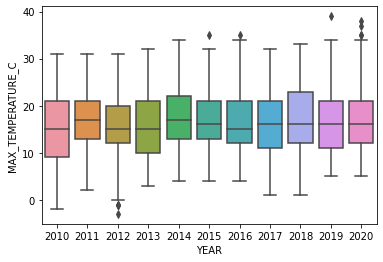

In [33]:
dftotal['DATE']=pd.to_datetime(dftotal['DATE'])
dftotal['YEAR']=dftotal['DATE'].apply(lambda date: date.year)

sns.boxplot(x = 'YEAR',
            y ='MAX_TEMPERATURE_C',
            data = dftotal)
plt.show()

l'année 2014 a la meilleur médiane et un max des températures maximum parmi les plus élevés. Selon ce graph, l'année 2014 semble donc avoir la meilleure météo. 
Les médianes sont assez similaires d'année en années mais la distribution change, avec des années ayant de plus grands écarts de températures et certaines des jours extrèmement froid ou extrèmement chaud. 